<a href="https://colab.research.google.com/github/idir15/Classification-des-signaux-cardiaque-ECG-/blob/master/Projet_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import des bibliothéques

In [ ]:
import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf

Lecture des fichiers CSV

In [ ]:
#charger les fichiers normal et abnormal dans une liste 
datalist = [pd.read_csv(''+x+'.csv') for x in ['normal', 'abnormal' ]]
# indexer l'axe des x de 0 a 187
for x in datalist :
    x.columns = list(range(len(x.columns)))


Préparation des données et des ensembles d'entrainement et de test

In [ ]:
#concaténation et melange des données 
data = pd.concat(datalist, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
data = data.rename({187: 'label'}, axis=1)
print(data.head(10))

          0         1         2         3         4         5         6  \
0  1.000000  0.887073  0.774146  0.713224  0.682021  0.699851  0.595840   
1  1.000000  0.684376  0.395907  0.288863  0.262102  0.231405  0.234160   
2  1.000000  0.645543  0.270195  0.089833  0.038997  0.064067  0.045265   
3  0.995881  0.993821  0.959835  0.872297  0.542739  0.054583  0.000000   
4  0.996020  0.323383  0.109453  0.035821  0.264677  0.342289  0.367164   
5  0.963246  1.000000  0.820388  0.414355  0.182039  0.070735  0.125520   
6  0.964159  0.536598  0.286976  0.109288  0.075215  0.068147  0.039374   
7  1.000000  0.886147  0.480085  0.201974  0.000000  0.017624  0.125485   
8  1.000000  0.557225  0.304432  0.031985  0.000000  0.021965  0.146435   
9  0.943678  1.000000  0.794713  0.592414  0.482759  0.399310  0.328276   

          7         8         9  ...  178  179  180  181  182  183  184  185  \
0  0.552749  0.469539  0.481426  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.218811  0

Visualisation des signaux

Text(0, 0.5, 'amplitude')

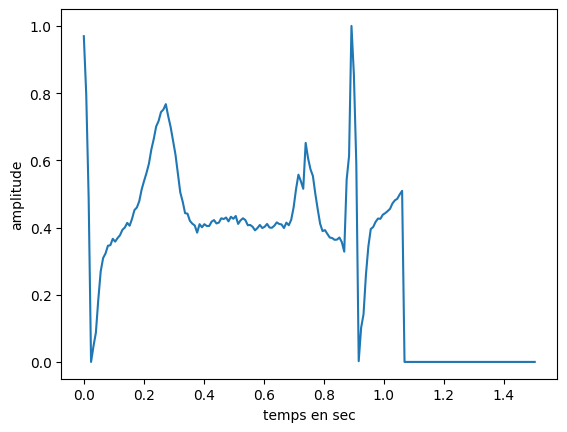

In [ ]:
te=1/125
t=np.linspace(0,len(data.iloc[0])*te,len(data.iloc[0]))
fig, axs=plt.subplots()
axs.plot(t,data.iloc[5])
plt.xlabel('temps en sec')
plt.ylabel('amplitude')

In [ ]:
#Generation des données et des labels
label = data['label'].copy()
Data = data.drop('label', axis=1)

#Generation des données et des label d'entrainnement et de test
data_train, data_test, label_train, label_test = train_test_split(
    Data, label, test_size=0.3, random_state=1)



In [ ]:
print(Data.head(15))

         0         1         2         3         4         5         6    \
0   1.000000  0.462723  0.168558  0.134117  0.254052  0.254862  0.266613   
1   1.000000  0.699693  0.268049  0.089862  0.000000  0.087558  0.192780   
2   0.996067  0.931461  0.547753  0.195506  0.116292  0.099438  0.083146   
3   1.000000  0.929658  0.372243  0.071483  0.077947  0.146008  0.148289   
4   0.932886  0.993848  0.692394  0.450224  0.354586  0.337808  0.334452   
5   0.969466  0.796183  0.489313  0.000000  0.046565  0.087023  0.185496   
6   1.000000  0.553504  0.192830  0.041825  0.125475  0.205866  0.229223   
7   1.000000  0.893698  0.300420  0.021008  0.039076  0.096218  0.095378   
8   0.995152  1.000000  0.650508  0.542705  0.438827  0.383195  0.292936   
9   1.000000  0.546233  0.144264  0.000000  0.081764  0.202055  0.271832   
10  1.000000  0.657457  0.409810  0.195596  0.156156  0.185185  0.182583   
11  1.000000  0.885200  0.620146  0.379854  0.008441  0.042769  0.089477   
12  1.000000

In [ ]:
print(label.head(15))

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     0.0
6     1.0
7     1.0
8     1.0
9     1.0
10    0.0
11    1.0
12    0.0
13    1.0
14    1.0
Name: label, dtype: float64


Création du réseau de neurones

In [ ]:
#declaration de la forme des entrées
inputs = keras.Input(shape=(187,))
#declaration des couches cachees
dense = layers.Dense(125, activation="relu")
x = dense(inputs)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
#creation du modele
NN_model = keras.Model(inputs=inputs, outputs=outputs, name="NN_model")
NN_model.summary()

Model: "NN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 187)]             0         
                                                                 
 dense (Dense)               (None, 125)               23500     
                                                                 
 dense_1 (Dense)             (None, 64)                8064      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 31,629
Trainable params: 31,629
Non-trainable params: 0
_________________________________________________________________


Entrainement du réseau de neurones

In [ ]:
NN_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001), loss="BinaryCrossentropy", 
                 metrics=["accuracy", keras.metrics.AUC(name="auc")])
NN_history=NN_model.fit(
    data_train,
    label_train,
    validation_split=0.2,
    batch_size=32,
    epochs=250,
    callbacks= [
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]

)

Epoch 1/250
255/255 [==============================] - 3s 7ms/step - loss: 0.6015 - accuracy: 0.7214 - auc: 0.6038 - val_loss: 0.5724 - val_accuracy: 0.7369 - val_auc: 0.6346
Epoch 2/250
255/255 [==============================] - 1s 4ms/step - loss: 0.5703 - accuracy: 0.7214 - auc: 0.6426 - val_loss: 0.5477 - val_accuracy: 0.7369 - val_auc: 0.6668
Epoch 3/250
255/255 [==============================] - 1s 3ms/step - loss: 0.5516 - accuracy: 0.7214 - auc: 0.6838 - val_loss: 0.5312 - val_accuracy: 0.7369 - val_auc: 0.7027
Epoch 4/250
255/255 [==============================] - 1s 3ms/step - loss: 0.5371 - accuracy: 0.7214 - auc: 0.7209 - val_loss: 0.5183 - val_accuracy: 0.7369 - val_auc: 0.7347
Epoch 5/250
255/255 [==============================] - 1s 3ms/step - loss: 0.5243 - accuracy: 0.7214 - auc: 0.7521 - val_loss: 0.5067 - val_accuracy: 0.7369 - val_auc: 0.7610
Epoch 6/250
255/255 [==============================] - 1s 3ms/step - loss: 0.5125 - accuracy: 0.7215 - auc: 0.7749 - val_loss

Evaluation du réseau de neurones

In [ ]:
NN_model.evaluate(data_test,label_test)

137/137 [==============================] - 0s 2ms/step - loss: 0.2716 - accuracy: 0.8990 - auc: 0.9466


[0.2716125249862671, 0.8989690542221069, 0.9466163516044617]

Visualisation de la perte et de la perte de validation

[0.6014688611030579, 0.570340096950531, 0.5515944957733154, 0.5370967388153076, 0.5243251919746399, 0.5124889612197876, 0.501859724521637, 0.49253150820732117, 0.48429322242736816, 0.4769495725631714, 0.4703512489795685, 0.4641382396221161, 0.45821642875671387, 0.4528064429759979, 0.4477589726448059, 0.4432552754878998, 0.43900591135025024, 0.4350350499153137, 0.43137580156326294, 0.42779895663261414, 0.4245222806930542, 0.42141449451446533, 0.41837278008461, 0.4155453145503998, 0.4128125011920929, 0.4101565480232239, 0.4076599180698395, 0.40514132380485535, 0.40281909704208374, 0.40043148398399353, 0.39842090010643005, 0.3962538540363312, 0.3941965401172638, 0.3923659920692444, 0.39039668440818787, 0.3885604739189148, 0.3867422044277191, 0.38485923409461975, 0.38333860039711, 0.381603866815567, 0.38002070784568787, 0.37851038575172424, 0.3769223988056183, 0.3755247890949249, 0.3740173280239105, 0.3727882504463196, 0.37129148840904236, 0.3700200021266937, 0.36895743012428284, 0.3676772

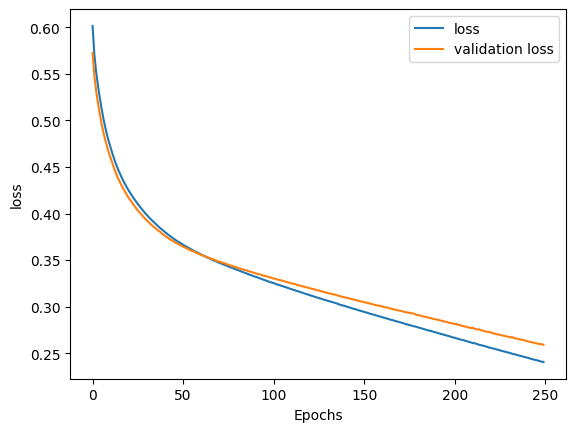

In [ ]:
print(NN_history.history['loss'])
fig,axs=plt.subplots()
axs.plot(NN_history.history['loss'])
axs.plot(NN_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['loss','validation loss'])

Création du modèle LSTM

In [ ]:
inputs = keras.Input(shape=(187))
#declaration des couches cachees
expend=tf.expand_dims(inputs, axis=2)
lstm = layers.LSTM(units=128,return_sequences=True)(expend)
flatten=layers.Flatten()(lstm)
outputs = layers.Dense(1, activation="sigmoid")(flatten)
model = keras.Model(inputs=inputs, outputs=outputs, name="test_model")
model.summary()

Model: "test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 187)]             0         
                                                                 
 tf.expand_dims_2 (TFOpLambd  (None, 187, 1)           0         
 a)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 187, 128)          66560     
                                                                 
 flatten_2 (Flatten)         (None, 23936)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 23937     
                                                                 
Total params: 90,497
Trainable params: 90,497
Non-trainable params: 0
____________________________________________________

Entrainement du LSTM

In [ ]:
model.compile(optimizer='Adam', loss="BinaryCrossentropy", 
              metrics=["accuracy", keras.metrics.AUC(name="auc")])
history=model.fit(
    data_train,
    label_train,
    validation_split=0.2,
    batch_size=32,
    epochs=250,
    callbacks= [
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]

)

Epoch 1/250
255/255 [==============================] - 54s 199ms/step - loss: 0.4696 - accuracy: 0.7661 - auc: 0.8040 - val_loss: 0.4347 - val_accuracy: 0.7786 - val_auc: 0.8410
Epoch 2/250
255/255 [==============================] - 52s 203ms/step - loss: 0.4209 - accuracy: 0.7986 - auc: 0.8547 - val_loss: 0.3874 - val_accuracy: 0.8174 - val_auc: 0.8740
Epoch 3/250
255/255 [==============================] - 49s 193ms/step - loss: 0.3867 - accuracy: 0.8173 - auc: 0.8791 - val_loss: 0.3614 - val_accuracy: 0.8321 - val_auc: 0.8964
Epoch 4/250
255/255 [==============================] - 50s 197ms/step - loss: 0.3459 - accuracy: 0.8414 - auc: 0.9054 - val_loss: 0.3102 - val_accuracy: 0.8665 - val_auc: 0.9265
Epoch 5/250
255/255 [==============================] - 49s 193ms/step - loss: 0.3069 - accuracy: 0.8617 - auc: 0.9267 - val_loss: 0.2851 - val_accuracy: 0.8817 - val_auc: 0.9385
Epoch 6/250
255/255 [==============================] - 49s 192ms/step - loss: 0.2557 - accuracy: 0.8899 - auc:

Evaluation du LSTM

In [ ]:
model.evaluate(data_test, label_test)


137/137 [==============================] - 9s 62ms/step - loss: 0.1179 - accuracy: 0.9592 - auc: 0.9904


[0.11791440099477768, 0.9592210650444031, 0.9903545379638672]

Affichage des pertes

[0.4696492552757263, 0.4208640158176422, 0.38665395975112915, 0.3459044396877289, 0.3069314956665039, 0.2557106912136078, 0.23266224563121796, 0.20079322159290314, 0.1912088394165039, 0.1759570837020874, 0.16105346381664276, 0.14054237306118011, 0.1333412528038025, 0.1302938461303711, 0.11779508739709854, 0.10809914767742157, 0.1083369106054306, 0.09740883857011795, 0.09601365774869919, 0.10201138257980347, 0.10336515307426453, 0.08822108805179596]


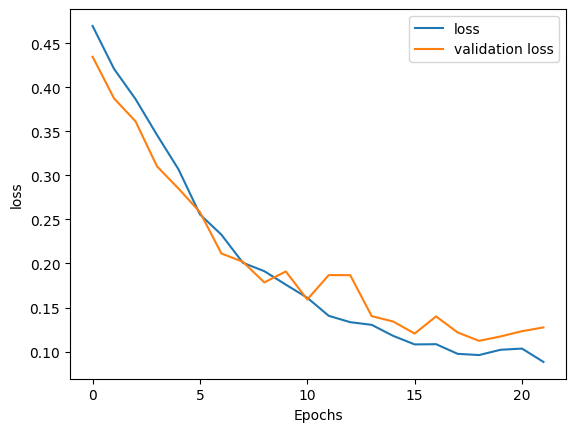

In [ ]:
print(history.history['loss'])
fig,axs=plt.subplots()
axs.plot(history.history['loss'])
axs.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['loss','validation loss'])